In [20]:
import numpy as np
import pandas as pd
import folium
import seaborn as sns

In [ ]:
%pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('kc_house_data.csv')

In [12]:
df.sample()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13046,8651611590,20140528T000000,840000.0,4,2.5,3420,8405,2.0,0,0,...,10,3420,0,2000,0,98074,47.6328,-122.064,3230,8460


In [26]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Изучите распределение года постройки.

Text(0, 0.5, 'Количество')

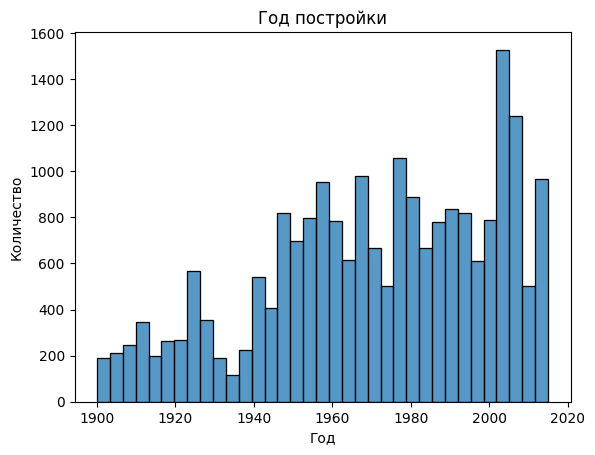

In [36]:
sns.histplot(df['yr_built'])
plt.title('Год постройки')
plt.xlabel('Год')
plt.ylabel('Количество')

Изучите стоимости недвижимости.

Text(0, 0.5, 'Количество')

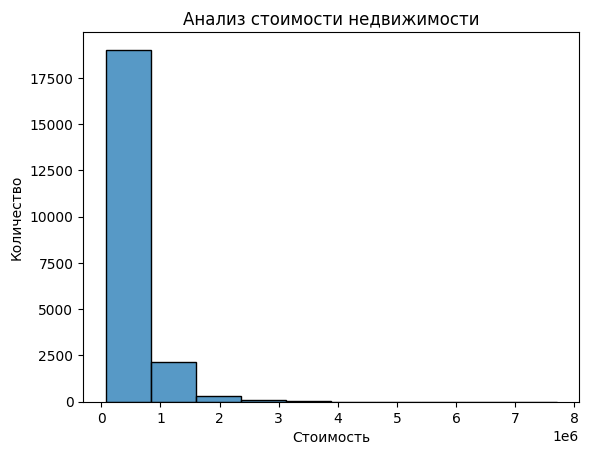

In [64]:
sns.histplot(df['price'], bins=10)
plt.title('Анализ стоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество')

Изучите распределение квадратуры жилой.

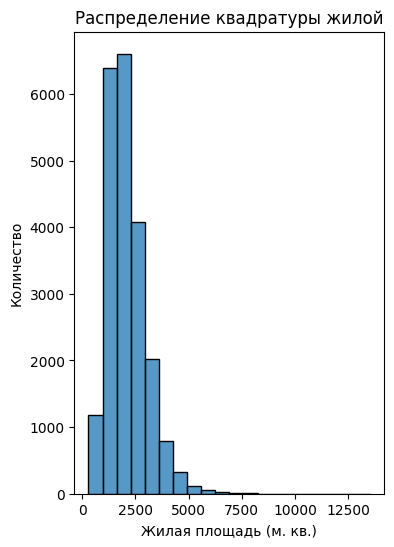

In [79]:
plt.figure(figsize=(4, 6))
sns.histplot(df['sqft_living'], bins=20)
plt.title('Распределение квадратуры жилой')
plt.xlabel('Жилая площадь (м. кв.)')
plt.ylabel('Количество');

Изучите распределение домов от наличия вида на набережную.

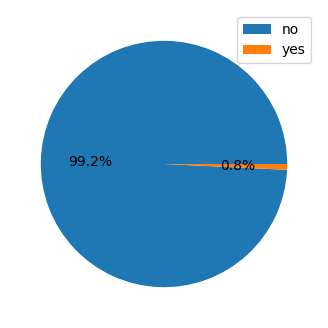

In [82]:
data = df['waterfront'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(data, autopct='%1.1f%%')
plt.legend(['no', 'yes']);

Изучите распределение этажей домов.

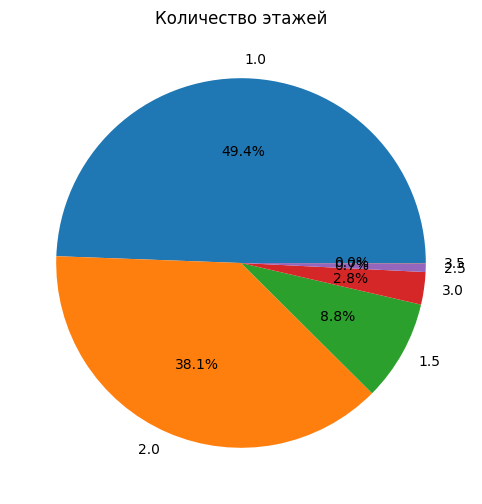

In [85]:
data = df['floors'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(data, autopct='%1.1f%%', labels=data.index)
plt.title('Количество этажей');

Изучите распределение состояния домов.

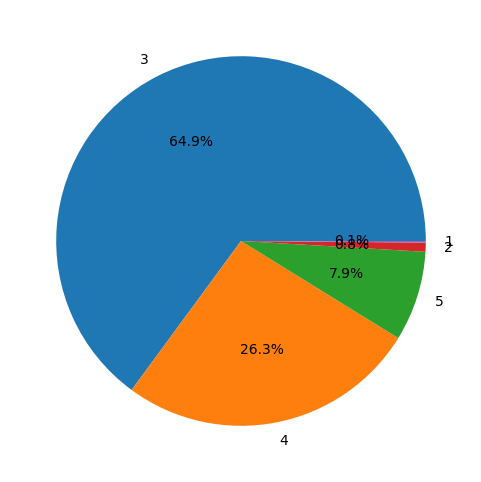

In [87]:
data = df['condition'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(data, autopct='%1.1f%%', labels=data.index);

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [88]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


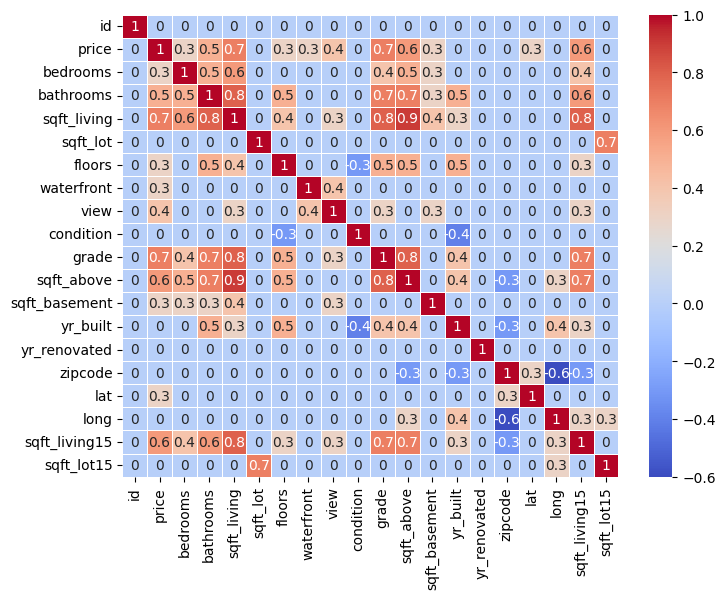

In [89]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

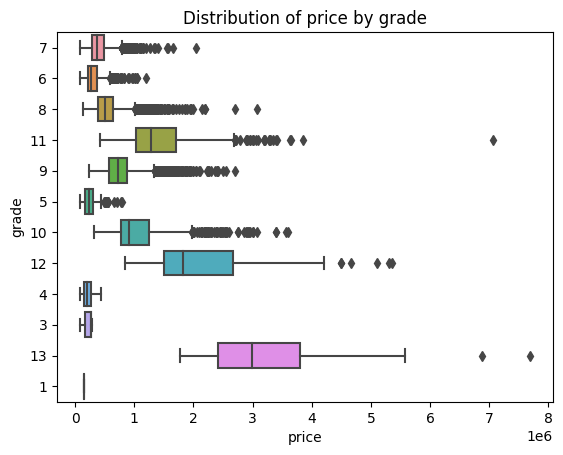

In [91]:
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('grade')
plt.title('Distribution of price by grade');

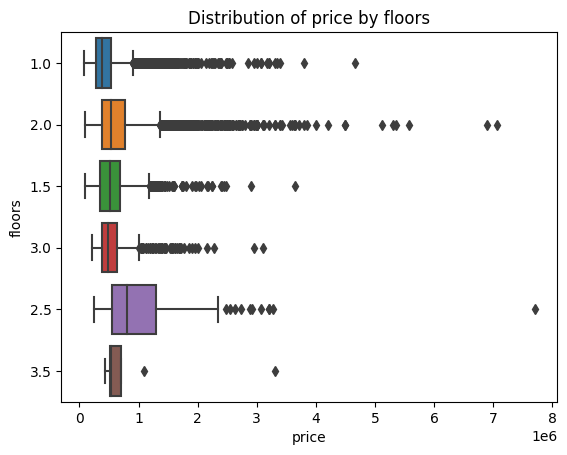

In [92]:
sns.boxplot(x=df['price'], y=df['floors'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('floors')
plt.title('Distribution of price by floors');

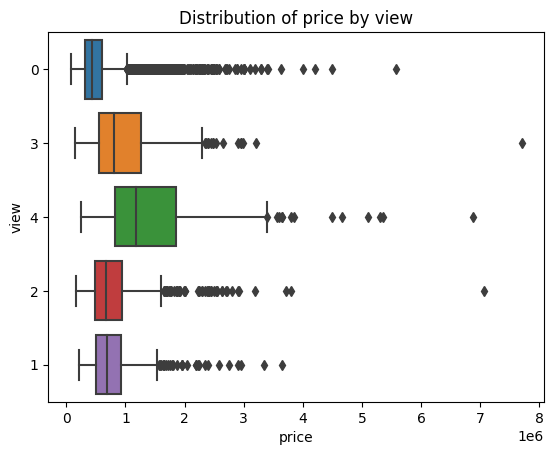

In [93]:
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('view')
plt.title('Distribution of price by view');